In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import random as rd
import matplotlib.pyplot as pl
from timeit import default_timer as timer

from tsp_pythran import TSP, run_tests, Compiler

print(sys.platform)
print(sys.version)

darwin
3.7.1 | packaged by conda-forge | (default, Nov 13 2018, 10:30:07) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


## Compile
+ **IMPORTANT**: Restart kernel after compiling

In [3]:
# c = Compiler()
# c.run(force=True)

## Test

In [4]:
run_tests()

Start tests

>>>> Run test single threaded
start search
run time = 0.00 s
(3.458367150287987, [0, 3, 7, 1, 5, 8, 2, 4, 6, 9], {'compute_energy': 86.0, 'ratio': 0.86, 'store_len': 86.0, 'nb_step': 100.0})
done

>>>> Run test concurrent single threaded
start search
task 1/4 done
task 3/4 done
task 4/4 done
task 2/4 done
run time = 0.12 s
Shortest paths found:
[14.202730372958973, 14.229629401807626, 15.341477919564593, 16.039325685029006]
done

>>>> Run test multi threaded
start search
run time = 0.06 s
Shortest paths found:
[13.91189915596965, 14.383053092698576, 14.402737469581364, 15.844710483886276]
done


## Set Params

In [5]:
nb_city = 100
nb_run = int(8)
nb_step = int(1e6)

beta_mult = 1.02
accept_nb_step = 100
p1 = 0.2
p2 = 0.8

tsp = TSP(nb_city, nb_run, nb_step, beta_mult, accept_nb_step, p1, p2)
tsp.show_params()

value
param                     
nb_city             100.00
nb_run                8.00
nb_step         1000000.00
beta_mult             1.02
accept_nb_step      100.00
p1                    0.20
p2                    0.80

## Generate or Load Cities

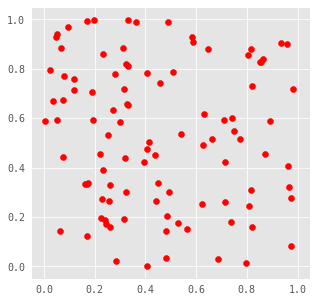

In [6]:
# tsp.load_cities('my-search')
tsp.generate_cities(seed=54321)
tsp.show_cities()

## A.1 - Search - Concurrent - Do not check signature

In [7]:
tsp.search_concurrent('concurrent-nosig', check_signature=False, dated=False)
tsp.save_results() # in folder dump/concurrent-nosig-nbcities/

start search
task 3/8 done
task 8/8 done
task 7/8 done
task 4/8 done
task 5/8 done
task 6/8 done
task 2/8 done
task 1/8 done
run time = 6.27 s
results saved to dump/concurrent-nosig-100/results.json


distance
solution          
5         7.935386
7         7.941840
2         7.961739
0         8.086451
6         8.105808
4         8.112629
1         8.133364
3         8.153960

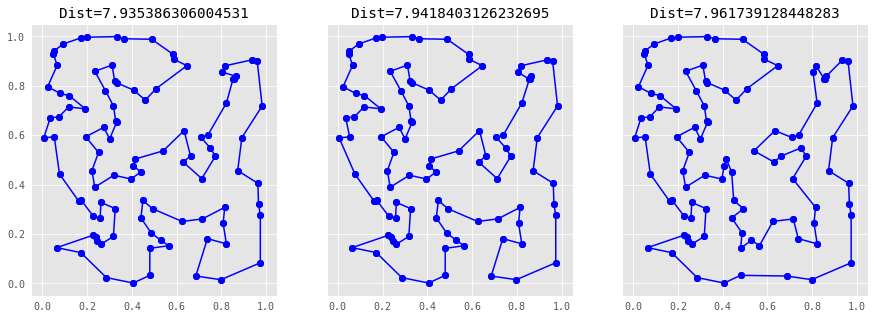

In [8]:
tsp.show_results(nb_best=3, save=True)

## A.2 - Search - Concurrent - Check signature

In [9]:
tsp.search_concurrent('concurrent-sig', check_signature=True, dated=False)
tsp.save_results() # in folder dump/concurrent-sig-nbcities/

start search
task 7/8 done
task 8/8 done
task 6/8 done
task 1/8 done
task 4/8 done
task 2/8 done
task 3/8 done
task 5/8 done
run time = 12.97 s
results saved to dump/concurrent-sig-100/results.json


distance
solution          
6         7.964802
3         7.999039
7         8.020219
4         8.059857
0         8.063343
2         8.068666
1         8.104296
5         8.264086

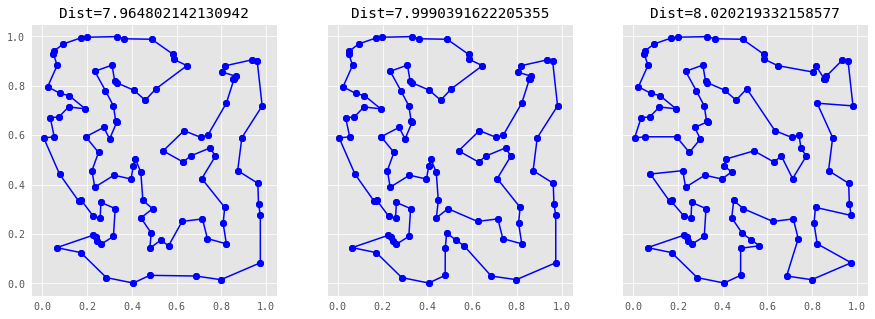

In [10]:
tsp.show_results(nb_best=3, save=True)

In [11]:
tsp.res['store_stats']

[{'compute_energy': 979938.0,
  'ratio': 0.979938,
  'store_len': 979938.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980195.0,
  'ratio': 0.980195,
  'store_len': 980195.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980910.0,
  'ratio': 0.98091,
  'store_len': 980910.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980382.0,
  'ratio': 0.980382,
  'store_len': 980382.0,
  'nb_step': 1000000.0},
 {'compute_energy': 981100.0,
  'ratio': 0.9811,
  'store_len': 981100.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980555.0,
  'ratio': 0.980555,
  'store_len': 980555.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980673.0,
  'ratio': 0.980673,
  'store_len': 980673.0,
  'nb_step': 1000000.0},
 {'compute_energy': 978992.0,
  'ratio': 0.978992,
  'store_len': 978992.0,
  'nb_step': 1000000.0}]

## B.1 - Search - OMP - Do not check signature

In [12]:
tsp.search_omp('omp-nosig', check_signature=False, dated=False)
tsp.save_results() # in folder dump/omp-nosig-nbcities/

start search
run time = 6.62 s
results saved to dump/omp-nosig-100/results.json


distance
solution          
3         8.071684
5         8.076049
7         8.094772
2         8.100378
0         8.115685
1         8.130101
6         8.141263
4         8.142744

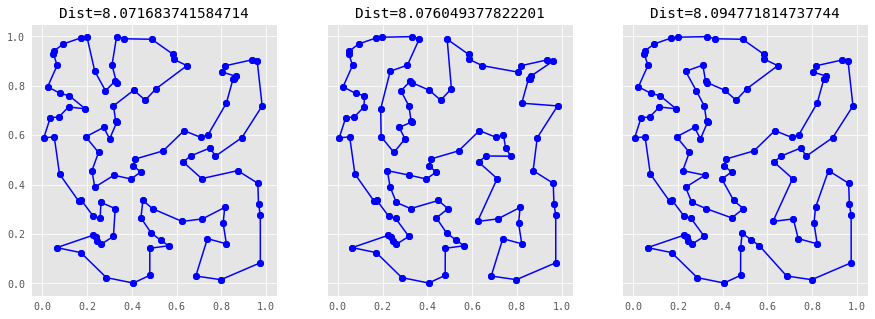

In [13]:
tsp.show_results(nb_best=3, save=True)

## B.2 - Search - OMP - Check signature

In [14]:
tsp.search_omp('omp-sig', check_signature=True, dated=False)
tsp.save_results() # in folder dump/omp-sig-nbcities/

start search
run time = 19.93 s
results saved to dump/omp-sig-100/results.json


distance
solution          
7         8.009784
0         8.048908
2         8.055188
4         8.069874
3         8.073351
1         8.083165
5         8.157781
6         8.158732

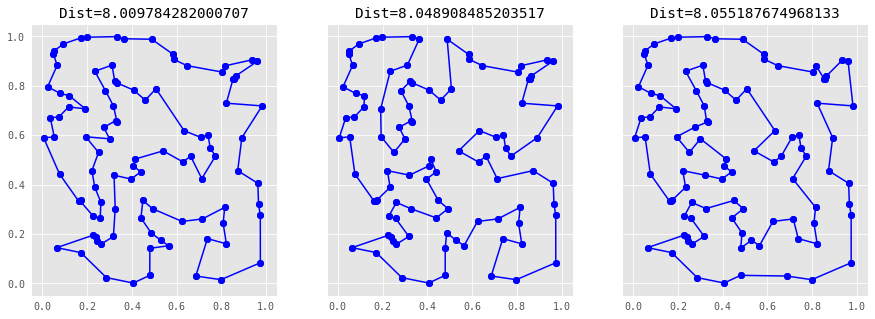

In [15]:
tsp.show_results(nb_best=3, save=True)

In [16]:
tsp.res['store_stats']

[{'compute_energy': 979203.0,
  'ratio': 0.979203,
  'store_len': 979203.0,
  'nb_step': 1000000.0},
 {'compute_energy': 979202.0,
  'ratio': 0.979202,
  'store_len': 979202.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980143.0,
  'ratio': 0.980143,
  'store_len': 980143.0,
  'nb_step': 1000000.0},
 {'compute_energy': 979979.0,
  'ratio': 0.979979,
  'store_len': 979979.0,
  'nb_step': 1000000.0},
 {'compute_energy': 979520.0,
  'ratio': 0.97952,
  'store_len': 979520.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980275.0,
  'ratio': 0.980275,
  'store_len': 980275.0,
  'nb_step': 1000000.0},
 {'compute_energy': 979863.0,
  'ratio': 0.979863,
  'store_len': 979863.0,
  'nb_step': 1000000.0},
 {'compute_energy': 980483.0,
  'ratio': 0.980483,
  'store_len': 980483.0,
  'nb_step': 1000000.0}]